In [5]:
import yfinance as yf
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt


In [39]:
df=web.DataReader("AAPL","stooq","2023-01-01","2025-10-20").sort_index()
start_date="2023-01-01"
end_date="2025-10-20"
df["sma9"]=df["Close"].rolling(9).mean()
df["sma20"]=df["Close"].rolling(20).mean()
df["signal"]=np.where(df["sma9"]>df["sma20"],1,np.where(df["sma9"]<df["sma20"],-1,0))



<function matplotlib.pyplot.show(close=None, block=None)>

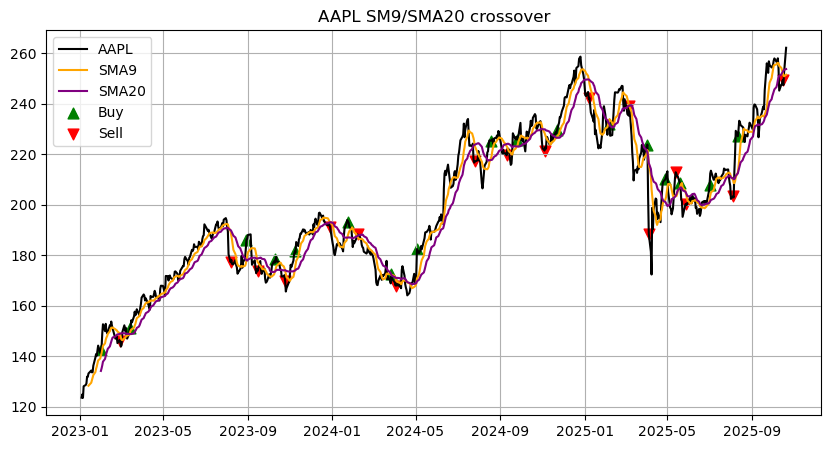

In [40]:
plt.figure(figsize=(10,5))
plt.plot(df["Close"],label="AAPL",color="black")
plt.plot(df["sma9"], label="SMA9",color="orange")
plt.plot(df["sma20"], label="SMA20",color="purple")
buy=(df["signal"]==1)&(df["signal"].shift(1)<=0)
sell=(df["signal"]==-1)&(df["signal"].shift(1)>=0)
plt.scatter(df.index[buy], df["Close"][buy], marker="^", color="green",label="Buy", s=60)
plt.scatter(df.index[sell], df["Close"][sell], marker="v", color="red",label="Sell", s=60)
plt.title("AAPL SM9/SMA20 crossover")
plt.legend()
plt.grid(True)
plt.show


In [57]:
buy_prices=df.loc[buy,"Close"]
sell_prices=df.loc[sell,"Close"]
trades=pd.DataFrame({"Buy":buy_prices.values[:len(sell_prices)],"Sell":sell_prices.values})
trades["Return%"]=(trades["Sell"]-trades["Buy"])/(trades["Buy"])*100
total_return=trades['Return%'].sum()
print(trades)
print(f"total Return:{trades['Return%'].sum():.2f}% from {start_date} to {end_date}")
yearly_percentage=total_return/2
print(f"average yearly % return is {yearly_percentage:.2f}")

        Buy     Sell    Return%
0   142.632  145.938   2.317853
1   151.067  177.310  17.371762
2   186.284  173.737  -6.735415
3   178.491  169.855  -4.838339
4   181.558  191.382   5.410943
5   193.339  188.281  -2.616130
6   172.495  168.046  -2.579205
7   182.518  217.230  19.018398
8   225.394  219.627  -2.558631
9   225.873  221.522  -1.926304
10  229.618  242.433   5.581008
11  232.215  239.070   2.952006
12  223.890  188.380 -15.860467
13  210.140  212.930   1.327686
14  208.780  200.420  -4.004215
15  207.820  203.350  -2.150900
16  227.180  249.340   9.754380
total Return:20.46% from 2023-01-01 to 2025-10-20
average yearly % return is 10.23
